<a href="https://colab.research.google.com/github/pingstech/ZeroToHero-ML/blob/main/08_MachineLearning_PolynomialLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
 
file_id = "1rulqD3PUET-9G7vNh4zldv3EE_P-cV4b"
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile("polynomial_linear_regression_dataset.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("polynomial_linear_regression_dataset.csv",sep=";")
df

,Car_Price,Car_MaxSpeed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [ ]:
tempX=df.Car_Price.values.reshape(-1,1)  #sklearn de hata almamamız için reshape uyguluyoruz UNUTMA!!!
tempY=df.Car_MaxSpeed.values.reshape(-1,1)
print(tempX)
print("****************************************")
print(tempY)

[[  60]
 [  70]
 [  80]
 [ 100]
 [ 120]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 400]
 [ 500]
 [ 750]
 [1000]
 [2000]
 [2000]]
****************************************
[[180]
 [180]
 [200]
 [200]
 [200]
 [220]
 [240]
 [240]
 [300]
 [350]
 [350]
 [360]
 [365]
 [365]
 [365]]


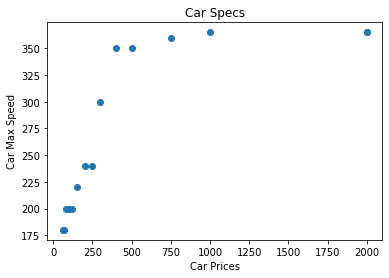

In [ ]:
plt.scatter(tempX,tempY)
plt.title("Car Specs")
plt.xlabel("Car Prices")
plt.ylabel("Car Max Speed")
plt.show()

In [ ]:
#burada iki tane değişkene bağlı olduğu için linear regression kullancağız

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(tempX,tempY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

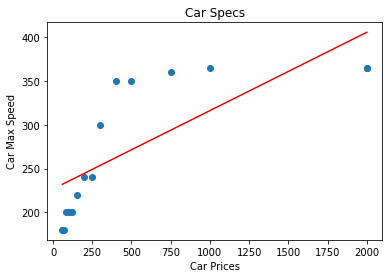

In [ ]:
prdctY=lr.predict(tempX)
plt.plot(tempX,prdctY,color="red")
plt.scatter(tempX,tempY)
plt.title("Car Specs")
plt.xlabel("Car Prices")
plt.ylabel("Car Max Speed")
plt.show()

In [ ]:
#Yukarıdaki grafike görüldüğü gibi linear regression ile hata oranı yüksek bir tahmin bulduk

In [ ]:
print("5 500 000₺'lik bir arabanın maksimum hızı {} kmh'dir".format(int(lr.predict([[5500]]))))

5 500 000₺'lik bir arabanın maksimum hızı 718 kmh'dir


In [ ]:
#Yukarıdaki sonuç gerçek olmayacağını zaten bu print çıktısındanda anlıyoruz

In [ ]:
#Polynomial Linear Regression => y=b0+(b1*x)+(b2*(x**2))+(b3*(x**3))+...+(bn*(x**n)) şeklindedir

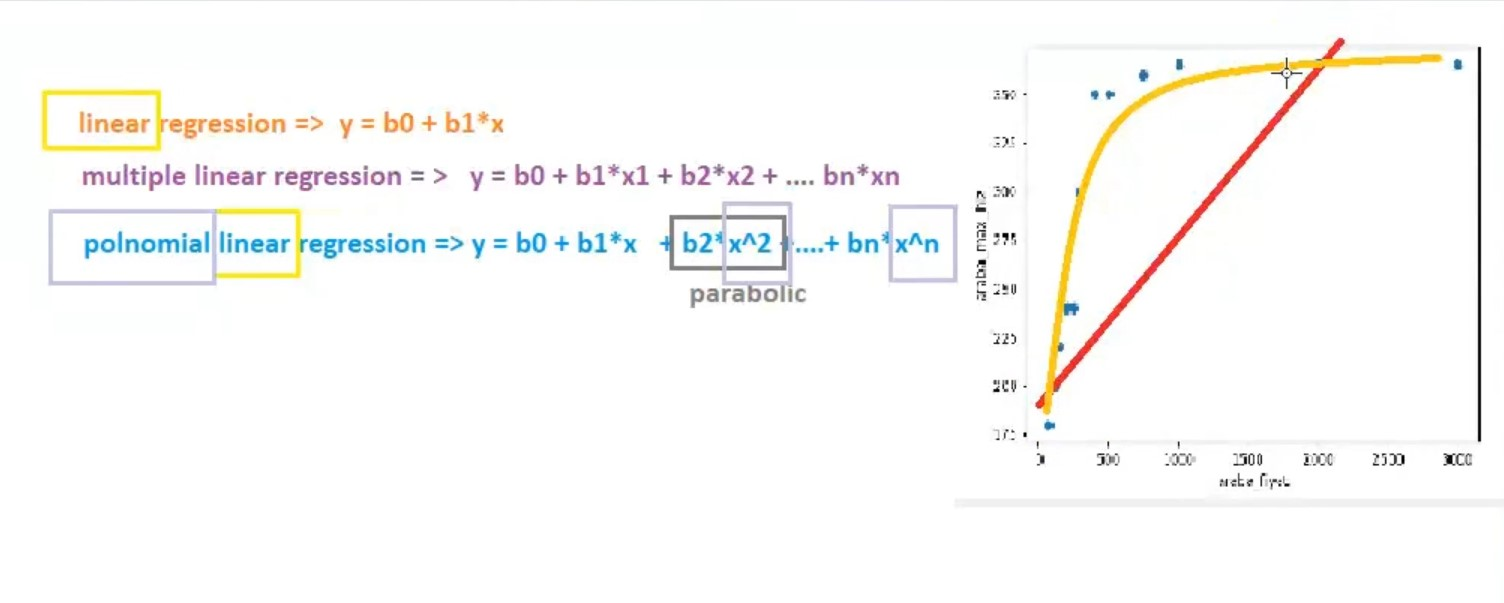

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomialRegression=PolynomialFeatures(degree=2) #(degree=2) demek, "y=b0+(b1*x)+(b2*(x**2))" anlamına gelir 
x_polynomial=polynomialRegression.fit_transform(tempX)  #"fit_transform" buradaki polynomial feature'ı alır ve onu ikinci dereceden bir polynomial feature'a çevirir
x_polynomial

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06]])

In [ ]:
lr2=LinearRegression()
lr2.fit(x_polynomial,tempY)
prdct_polinomial=lr2.predict(x_polynomial)

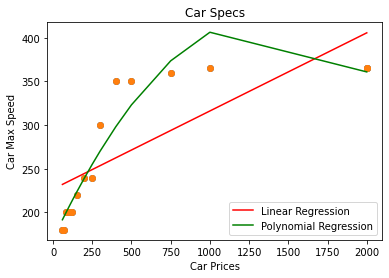

In [ ]:
plt.plot(tempX,prdctY,color="red",label="Linear Regression")
plt.plot(tempX,prdct_polinomial,color="green",label="Polynomial Regression")
plt.scatter(tempX,tempY)
plt.legend()
plt.scatter(tempX,tempY)
plt.title("Car Specs")
plt.xlabel("Car Prices")
plt.ylabel("Car Max Speed")
plt.show()

In [ ]:
#Bu modeli dahada iyileştirmek için (degree=x) değerindeki x'i arttırarak daha düşük bir hata oranı elde edebiliriz.

In [ ]:
#Daha düşük hata oranı için yapılan uygulama
polynomialRegression=PolynomialFeatures(degree=4) 
x_polynomial2=polynomialRegression.fit_transform(tempX)  
x_polynomial2
lr3=LinearRegression()
lr3.fit(x_polynomial2,tempY)
prdct_polinomial2=lr3.predict(x_polynomial2)

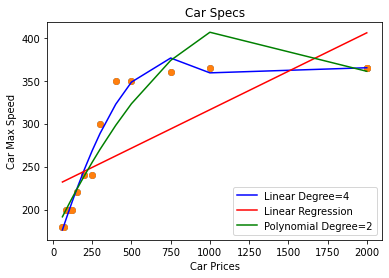

In [ ]:
plt.plot(tempX,prdct_polinomial2,color="blue",label="Linear Degree=4")
plt.plot(tempX,prdctY,color="red",label="Linear Regression")
plt.plot(tempX,prdct_polinomial,color="green",label="Polynomial Degree=2")
plt.scatter(tempX,tempY)
plt.legend()
plt.scatter(tempX,tempY)
plt.title("Car Specs")
plt.xlabel("Car Prices")
plt.ylabel("Car Max Speed")
plt.show()